# Sensitivity analysis

Import packages needed

In [834]:
#%%
#* Import the code needed
import os
from pathlib import Path
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.mplot3d import Axes3D

Set directory path

In [835]:
#%%
#* Define paths
directory_path = Path('../../')

Import datasets

In [836]:
pop = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 
    'regression_Population.xlsx',
    index_col=0)

PpD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 
    'regression_PpD.xlsx',
    index_col=0)

UFApD = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 
    'regression_UFApD.xlsx',
    index_col=0)

energy_intensity = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Energy_Intensity' / 'Energy_intensity_constants.xlsx',
    index_col=[0,1,2])

TS_cj = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Type_Split' / 'type_split_clean.xlsx',
    index_col=0)

lifetime = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 
    'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

lifetime_standard_deviation = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 
    'Dwelling_Lifetime' / 'lifetime_regression.xlsx',
    index_col=0)

## Sensitivity analysis for PpD

In [837]:
PpD = PpD.copy()
# Increase PpD by 10% from 2025 to 2050
for year in range(2025, 2051):
    PpD.loc[year] *= 1.10

In [838]:
TS_cj.loc['before 1900','% SFH']

0.98

Seperate out the lifetime and standard deviation datasets

In [839]:
#lifetime = lifetime.drop('std_dev', axis=1)
lifetime_standard_deviation = lifetime_standard_deviation.drop(
    'Avg_lifetime', axis=1)

lifetime = lifetime.loc[:, 'Avg_lifetime'].to_numpy()
lifetime

lifetime_standard_deviation = lifetime_standard_deviation.loc[
    :, 'std_dev'].to_numpy()

Import DSM module

In [840]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)

from dynamic_stock_model import DynamicStockModel

Calculate stock from pop/PpD

In [841]:
stock_t = np.divide(pop.drop_duplicates(),PpD)

/var/folders/0m/82gp5vbn5_n34tv3bntxm1h40000gn/T/ipykernel_1345/4106792660.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.divide(pop.drop_duplicates(),PpD)


Define a function that does the stock driven modeling

In [842]:
def calculate_inflow_by_type(inflow_t):
    SFH_inflow = pd.DataFrame()
    TH_inflow = pd.DataFrame()
    AB_inflow = pd.DataFrame()
    for year in inflow_t.columns:
        if int(year) <= 1900:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        'before 1900','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['before 1900','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['before 1900','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        if int(year) >= 1901 and int(year) <= 1955:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1901-1955','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '1956 - 1970','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1956 - 1970','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1956 - 1970','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '1971 - 1980','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1971 - 1980','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1971 - 1980','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '1981 - 1990','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1981 - 1990','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1981 - 1990','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '1991 - 2000','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1991 - 2000','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['1991 - 2000','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '2001 - 2010','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2001 - 2010','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc['2001 - 2010','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
        elif int(year) >= 2011:
            iteration_SFH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '2011 and after','% SFH']
                    )
                )
            SFH_inflow = pd.concat([SFH_inflow, iteration_SFH], axis=1)
            iteration_TH = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '2011 and after','% TH']
                    )
                )
            TH_inflow = pd.concat([TH_inflow, iteration_TH], axis=1)
            iteration_AB = pd.DataFrame(
                np.multiply(
                    inflow_t.loc[:,year],TS_cj.loc[
                        '2011 and after','% AB']
                    )
                )
            AB_inflow = pd.concat([AB_inflow, iteration_AB], axis=1)
    return SFH_inflow, TH_inflow, AB_inflow

In [843]:
def stock_driven_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock['Pop'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = pd.DataFrame(
        dwellings_stock_driven.i, index=np.arange(1600,2051))
    
    inflow_t_SFH, inflow_t_TH, inflow_t_AB = calculate_inflow_by_type(
        inflow_t.T)
    inflow_t_SFH = inflow_t_SFH.T
    inflow_t_TH = inflow_t_TH.T
    inflow_t_AB = inflow_t_AB.T
    
    return inflow_t_SFH, inflow_t_TH, inflow_t_AB

Run the stock driven model

In [844]:
i_SFH, i_TH, i_AB = stock_driven_model(stock_t)

In [845]:
i_SFH

,0
1600,72146.206526
1601,86.917974
1602,88.329757
1603,89.772627
1604,91.247654
...,...
2046,10699.332572
2047,10765.431881
2048,10833.390837
2049,10903.222453


Define a function that does the inflow driven modeling

In [846]:
def inflow_driven_model(inflow):
    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow[0],
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()

    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_inflow_driven.o_c

Run the inflow driven model

In [847]:
s_c_SFH, s_SFH, o_SFH = inflow_driven_model(i_SFH)
s_c_TH, s_TH, o_TH = inflow_driven_model(i_TH)
s_c_AB, s_AB, o_AB = inflow_driven_model(i_AB)

In [848]:
s_c_SFH

array([[7.21148685e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21122802e+04, 8.68802196e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.21094952e+04, 8.68771014e+01, 8.82913893e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.50180529e-06, 2.10041699e-09, 2.47679356e-09, ...,
        1.08333872e+04, 0.00000000e+00, 0.00000000e+00],
       [1.29302854e-06, 1.80929321e-09, 2.13452952e-09, ...,
        1.08333861e+04, 1.09032188e+04, 0.00000000e+00],
       [1.11273977e-06, 1.55777033e-09, 1.83867762e-09, ...,
        1.08333847e+04, 1.09032177e+04, 1.09749281e+04]])

In [849]:
i_SFH.rename(columns={0:'SFH'}, inplace=True)
i_TH.rename(columns={0:'TH'}, inplace=True)
i_AB.rename(columns={0:'AB'}, inplace=True)

In [850]:
i_SFH

,SFH
1600,72146.206526
1601,86.917974
1602,88.329757
1603,89.772627
1604,91.247654
...,...
2046,10699.332572
2047,10765.431881
2048,10833.390837
2049,10903.222453


Make s_c arrays into dataframes for easier use

In [851]:
UFApD.drop_duplicates(inplace=True)

s_SFH_df = pd.DataFrame(s_SFH)
s_SFH_df = s_SFH_df.set_index(UFApD.index)
s_SFH_df.columns = ['SFH']

s_TH_df = pd.DataFrame(s_TH)
s_TH_df = s_TH_df.set_index(UFApD.index)
s_TH_df.columns = ['TH']

s_AB_df = pd.DataFrame(s_AB)
s_AB_df = s_AB_df.set_index(UFApD.index)
s_AB_df.columns = ['AB']

s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)

s_c_TH_df = pd.DataFrame(s_c_TH)
s_c_TH_df = s_c_TH_df.set_index(UFApD.index)
s_c_TH_df.columns = np.arange(1600, 2051)

s_c_AB_df = pd.DataFrame(s_c_AB)
s_c_AB_df = s_c_AB_df.set_index(UFApD.index)
s_c_AB_df.columns = np.arange(1600, 2051)

i_SFH_df = pd.DataFrame(i_SFH)
i_SFH_df = i_SFH_df.set_index(UFApD.index)

o_SFH_df = pd.DataFrame(o_SFH)
o_SFH_df = o_SFH_df.set_index(UFApD.index)
o_SFH_df.columns = np.arange(1600, 2051)

i_TH_df = pd.DataFrame(i_TH)
i_TH_df = i_TH_df.set_index(UFApD.index)

o_TH_df = pd.DataFrame(o_TH)
o_TH_df = o_TH_df.set_index(UFApD.index)
o_TH_df.columns = np.arange(1600, 2051)

i_AB_df = pd.DataFrame(i_AB)
i_AB_df = i_AB_df.set_index(UFApD.index)

o_AB_df = pd.DataFrame(o_AB)
o_AB_df = o_AB_df.set_index(UFApD.index)
o_AB_df.columns = np.arange(1600, 2051)

Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [852]:
SFH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [853]:
s_total = s_SFH_df + s_TH_df + s_AB_df

total_stock_by_tabula_cohort = SFH_stock_by_tabula_cohort + TH_stock_by_tabula_cohort + AB_stock_by_tabula_cohort

stock_change_SFH = i_SFH_df.values - pd.DataFrame(o_SFH_df.sum(axis=1))
stock_change_SFH = pd.DataFrame(
    stock_change_SFH, index=np.arange(1600,2051))

stock_change_TH = i_TH_df.values - pd.DataFrame(o_TH_df.sum(axis=1))
stock_change_TH = pd.DataFrame(
    stock_change_TH, index=np.arange(1600,2051))

stock_change_AB = i_AB_df.values - pd.DataFrame(o_AB_df.sum(axis=1))
stock_change_AB = pd.DataFrame(
    stock_change_AB, index=np.arange(1600,2051))

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH_df.values + i_TH_df.values + i_AB_df.values
i_total = pd.DataFrame(i_total, index=np.arange(1600,2051))

o_total = o_SFH_df + o_TH_df + o_AB_df

Convert number of dwellings into floor area by DSM cohort

In [854]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

i_SFH_UFA = i_SFH_df.mul(UFApD['UFApD SFH'].values, axis=0)
i_SFH_UFA = pd.DataFrame(i_SFH_UFA)

o_SFH_UFA = o_SFH_df @ np.diag(UFApD['UFApD SFH'])
o_SFH_UFA = pd.DataFrame(o_SFH_UFA)
o_SFH_UFA.columns = np.arange(1600, 2051)

i_TH_UFA = i_TH_df.mul(UFApD['UFApD TH'].values, axis=0)
i_TH_UFA = pd.DataFrame(i_TH_UFA)

o_TH_UFA = o_TH_df @ np.diag(UFApD['UFApD TH'])
o_TH_UFA = pd.DataFrame(o_TH_UFA)
o_TH_UFA.columns = np.arange(1600, 2051)

i_AB_UFA = i_AB_df.mul(UFApD['UFApD AB'].values, axis=0)
i_AB_UFA = pd.DataFrame(i_AB_UFA)

o_AB_UFA = o_AB_df @ np.diag(UFApD['UFApD AB'])
o_AB_UFA = pd.DataFrame(o_AB_UFA)
o_AB_UFA.columns = np.arange(1600, 2051)

Make s_c_UFA arrays into dataframes for easier use

In [855]:
UFApD.drop_duplicates(inplace=True)

s_UFA_c_SFH_df = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH_df = s_UFA_c_SFH_df.set_index(UFApD.index)
s_UFA_c_SFH_df.columns = np.arange(1600, 2051)
s_UFA_c_SFH_df

s_UFA_c_TH_df = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH_df = s_UFA_c_TH_df.set_index(UFApD.index)
s_UFA_c_TH_df.columns = np.arange(1600, 2051)
s_UFA_c_TH_df

s_UFA_c_AB_df = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB_df = s_UFA_c_AB_df.set_index(UFApD.index)
s_UFA_c_AB_df.columns = np.arange(1600, 2051)
s_UFA_c_AB_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,917422.588277,922170.117669,927063.219121,932105.873105,937301.536812,942653.105961,0.000000,0.000000,0.000000,0.000000
2047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,917422.247082,922169.850546,927063.010583,932105.710762,937301.410787,942653.008405,948162.801606,0.000000,0.000000,0.000000
2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,917421.813188,922169.509844,927062.743815,932105.502477,937301.248620,942652.882500,948162.704129,953832.376103,0.000000,0.000000


Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [856]:
SFH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [857]:
s_UFA_total = s_UFA_c_SFH.sum(axis=1) + s_UFA_c_TH.sum(
    axis=1) + s_UFA_c_AB.sum(axis=1)

total_stock_UFA_by_tabula_cohort = SFH_UFA_stock_by_tabula_cohort + TH_UFA_stock_by_tabula_cohort + AB_UFA_stock_by_tabula_cohort

stock_change_SFH_UFA = i_SFH_UFA.values - pd.DataFrame(
    o_SFH_UFA.sum(axis=1))
stock_change_SFH_UFA = pd.DataFrame(
    stock_change_SFH_UFA, index=np.arange(1600,2051))

stock_change_TH_UFA = i_TH_UFA.values - pd.DataFrame(
    o_TH_UFA.sum(axis=1))
stock_change_TH_UFA = pd.DataFrame(
    stock_change_TH_UFA, index=np.arange(1600,2051))

stock_change_AB_UFA = i_AB_UFA.values - pd.DataFrame(
    o_AB_UFA.sum(axis=1))
stock_change_AB_UFA = pd.DataFrame(
    stock_change_AB_UFA, index=np.arange(1600,2051))

stock_change_total_UFA = stock_change_SFH_UFA + stock_change_TH_UFA + stock_change_AB_UFA

i_total_UFA = i_SFH_UFA.values + i_TH_UFA.values + i_AB_UFA.values
i_total_UFA = pd.DataFrame(i_total_UFA, index=np.arange(1600,2051))

o_total_UFA = o_SFH_UFA + o_TH_UFA + o_AB_UFA

Define a function that calculates energy use for SFH, original renovation level

In [858]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(s_UFA_c_SFH.loc[
                    :, year],energy_intensity.loc[
                        ('pre 1955' , 'SFH', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[:, year],
                    energy_intensity.loc[
                        ('1956-70' , 'SFH', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [859]:
# function that spits out energy use of SFH by DSM cohort
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)

# vector of energy use for SFH (not by cohort)
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)

Define a function that calculates energy use for TH, original renovation level

In [860]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [861]:
# function that spits out energy use of TH by DSM cohort
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)

# vector of energy use for TH (not by cohort)
energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)

Define a function that calculates energy use for AB, original renovation level

In [862]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(s_UFA_c_AB.loc[
                    :, year],energy_intensity.loc[
                        ('1991-2000' , 'AB', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

Run function that spits out energy use of AB by DSM cohort

In [863]:
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)

calculate vector of energy use for AB (not by cohort)

In [864]:
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)

Calculate total energy use matrix

In [865]:
energy_use_matrix_total = energy_use_matrix_SFH + energy_use_matrix_TH + energy_use_matrix_AB

Concatenate energy use vectors

In [866]:
energy_use_vectors_concatenated = pd.concat(
    [energy_use_vector_SFH, energy_use_vector_TH, energy_use_vector_AB],
      axis=1)
energy_use_vectors_concatenated = energy_use_vectors_concatenated.rename(
    columns={0: 'SFH', 1: 'TH', 2: 'AB'})


energy_use_vectors_concatenated 

,SFH,TH,AB
Year,,,
1600,5.437150e+09,5.548318e+07,0.000000e+00
1601,5.443498e+09,5.554801e+07,0.000000e+00
1602,5.449931e+09,5.561374e+07,0.000000e+00
1603,5.456449e+09,5.568039e+07,0.000000e+00
1604,5.463054e+09,5.574798e+07,0.000000e+00
...,...,...,...
2046,4.763380e+10,1.012837e+10,8.202958e+09
2047,4.733652e+10,1.013005e+10,8.244257e+09
2048,4.703216e+10,1.013032e+10,8.284743e+09


Put energy use matrix into tabula cohorts

In [867]:
energy_use_matrix_total_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(energy_use_matrix_total).loc[
        :,'1600':'1955'].sum(axis=1)/1000000000, 
          '1956-1970': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1956':'1970'].sum(axis=1)/1000000000, 
          '1971-1980': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1971':'1980'].sum(axis=1)/1000000000, 
          '1981-1990': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1981':'1990'].sum(axis=1)/1000000000, 
          '1991-2000': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1991':'2000'].sum(axis=1)/1000000000, 
          '2001-2010': pd.DataFrame(energy_use_matrix_total).loc[
            :,'2001':'2010'].sum(axis=1)/1000000000, 
          'post-2010': pd.DataFrame(energy_use_matrix_total).loc[
              :,'2011':'2050'].sum(axis=1)/1000000000}
          )

Calculate total energy use with modified PpD

In [868]:
total_energy_use_modified1 = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB

In [869]:
total_energy_use = pd.read_excel(
    directory_path / 
    'data/model_outputs_baseline/energy/total_energy_use.xlsx')



Original total energy use vs total energy use with PpD increased by 10%

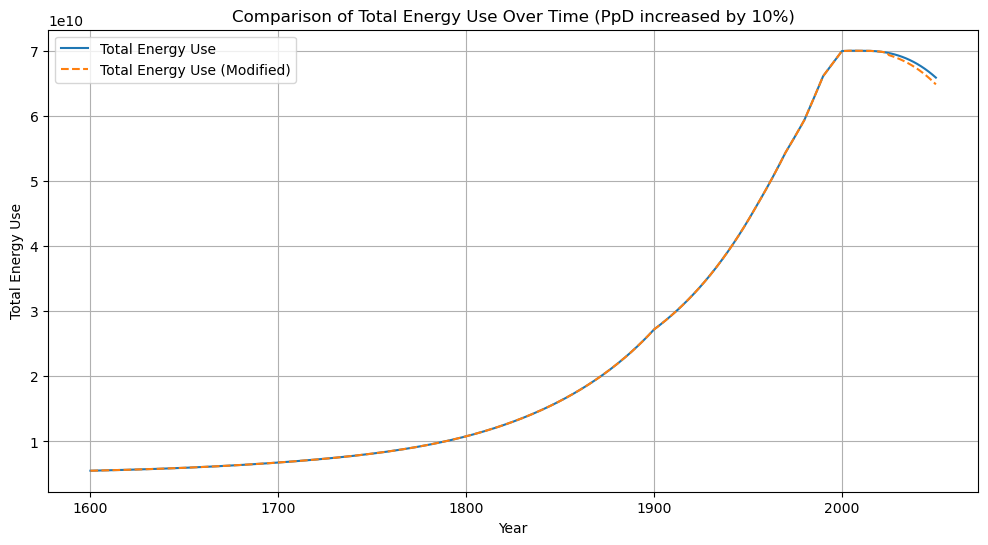

In [870]:
# Convert the Series to a DataFrame and reset the index
total_energy_use_modified1_df = total_energy_use_modified1.reset_index()

# Rename the columns
total_energy_use_modified1_df.columns = [
    'Year', 'Total Energy Use (Modified)']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(
    total_energy_use['Year'], total_energy_use['Total energy use'], 
    label='Total Energy Use')
plt.plot(
    total_energy_use_modified1_df['Year'], 
    total_energy_use_modified1_df['Total Energy Use (Modified)'], 
    label='Total Energy Use (Modified)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.title('Comparison of Total Energy Use Over Time (PpD increased by 10%)')
plt.legend()
plt.grid(True)
plt.show()

In [871]:
aligned_data1 = total_energy_use.set_index('Year')

# total_energy_use_modified1 is a Series with 'Year' as index
aligned_data2 = total_energy_use_modified1

# Focus on the years from 2025 to 2050
start_year = 2025
end_year = 2050
filtered_data1 = aligned_data1.loc[start_year:end_year]
filtered_data2 = aligned_data2.loc[start_year:end_year]

# Calculate the reduction percentage for these years
reduction_percentage = (
    (filtered_data1[
        'Total energy use'] - filtered_data2) / filtered_data1[
            'Total energy use']) * 100

# Calculate the average reduction percentage
average_reduction_percentage = reduction_percentage.mean()
print(f"When we increase PpD by 10% from 2025 to 2050, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")


When we increase PpD by 10% from 2025 to 2050, the total energy use reduces by an average of 1.00%.


## Sensitivity analysis for UFApD

In [872]:
PpD = PpD.copy()
# set the original values for PpD
for year in range(2025, 2051):
    PpD.loc[year] /= 1.10

UFApD = UFApD.copy()
# decrease UFApD by 10% from 2025 to 2050
for year in range(2025, 2051):
    UFApD.loc[year] *= 0.9

Calculate stock from pop/PpD

In [873]:
stock_t = np.divide(pop.drop_duplicates(),PpD)

/var/folders/0m/82gp5vbn5_n34tv3bntxm1h40000gn/T/ipykernel_1345/4106792660.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.divide(pop.drop_duplicates(),PpD)


In [874]:
def stock_driven_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock['Pop'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = pd.DataFrame(
        dwellings_stock_driven.i, index=np.arange(1600,2051))
    
    inflow_t_SFH, inflow_t_TH, inflow_t_AB = calculate_inflow_by_type(
        inflow_t.T)
    inflow_t_SFH = inflow_t_SFH.T
    inflow_t_TH = inflow_t_TH.T
    inflow_t_AB = inflow_t_AB.T
    
    return inflow_t_SFH, inflow_t_TH, inflow_t_AB

Run the stock driven model

In [875]:
i_SFH, i_TH, i_AB = stock_driven_model(stock_t)

Define a function that does the inflow driven modeling

In [876]:
def inflow_driven_model(inflow):
    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow[0],
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()

    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_inflow_driven.o_c

Run the inflow driven model

In [877]:
s_c_SFH, s_SFH, o_SFH = inflow_driven_model(i_SFH)
s_c_TH, s_TH, o_TH = inflow_driven_model(i_TH)
s_c_AB, s_AB, o_AB = inflow_driven_model(i_AB)

In [878]:
i_SFH.rename(columns={0:'SFH'}, inplace=True)
i_TH.rename(columns={0:'TH'}, inplace=True)
i_AB.rename(columns={0:'AB'}, inplace=True)

Make s_c arrays into dataframes for easier use

In [879]:
UFApD.drop_duplicates(inplace=True)

s_SFH_df = pd.DataFrame(s_SFH)
s_SFH_df = s_SFH_df.set_index(UFApD.index)
s_SFH_df.columns = ['SFH']

s_TH_df = pd.DataFrame(s_TH)
s_TH_df = s_TH_df.set_index(UFApD.index)
s_TH_df.columns = ['TH']

s_AB_df = pd.DataFrame(s_AB)
s_AB_df = s_AB_df.set_index(UFApD.index)
s_AB_df.columns = ['AB']

s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)

s_c_TH_df = pd.DataFrame(s_c_TH)
s_c_TH_df = s_c_TH_df.set_index(UFApD.index)
s_c_TH_df.columns = np.arange(1600, 2051)

s_c_AB_df = pd.DataFrame(s_c_AB)
s_c_AB_df = s_c_AB_df.set_index(UFApD.index)
s_c_AB_df.columns = np.arange(1600, 2051)

i_SFH_df = pd.DataFrame(i_SFH)
i_SFH_df = i_SFH_df.set_index(UFApD.index)

o_SFH_df = pd.DataFrame(o_SFH)
o_SFH_df = o_SFH_df.set_index(UFApD.index)
o_SFH_df.columns = np.arange(1600, 2051)

i_TH_df = pd.DataFrame(i_TH)
i_TH_df = i_TH_df.set_index(UFApD.index)

o_TH_df = pd.DataFrame(o_TH)
o_TH_df = o_TH_df.set_index(UFApD.index)
o_TH_df.columns = np.arange(1600, 2051)

i_AB_df = pd.DataFrame(i_AB)
i_AB_df = i_AB_df.set_index(UFApD.index)

o_AB_df = pd.DataFrame(o_AB)
o_AB_df = o_AB_df.set_index(UFApD.index)
o_AB_df.columns = np.arange(1600, 2051)

Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [880]:
SFH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [881]:
s_total = s_SFH_df + s_TH_df + s_AB_df

total_stock_by_tabula_cohort = SFH_stock_by_tabula_cohort + TH_stock_by_tabula_cohort + AB_stock_by_tabula_cohort

stock_change_SFH = i_SFH_df.values - pd.DataFrame(o_SFH_df.sum(axis=1))
stock_change_SFH = pd.DataFrame(
    stock_change_SFH, index=np.arange(1600,2051))

stock_change_TH = i_TH_df.values - pd.DataFrame(o_TH_df.sum(axis=1))
stock_change_TH = pd.DataFrame(
    stock_change_TH, index=np.arange(1600,2051))

stock_change_AB = i_AB_df.values - pd.DataFrame(o_AB_df.sum(axis=1))
stock_change_AB = pd.DataFrame(
    stock_change_AB, index=np.arange(1600,2051))

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH_df.values + i_TH_df.values + i_AB_df.values
i_total = pd.DataFrame(i_total, index=np.arange(1600,2051))

o_total = o_SFH_df + o_TH_df + o_AB_df

Convert number of dwellings into floor area by DSM cohort

In [882]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

i_SFH_UFA = i_SFH_df.mul(UFApD['UFApD SFH'].values, axis=0)
i_SFH_UFA = pd.DataFrame(i_SFH_UFA)

o_SFH_UFA = o_SFH_df @ np.diag(UFApD['UFApD SFH'])
o_SFH_UFA = pd.DataFrame(o_SFH_UFA)
o_SFH_UFA.columns = np.arange(1600, 2051)

i_TH_UFA = i_TH_df.mul(UFApD['UFApD TH'].values, axis=0)
i_TH_UFA = pd.DataFrame(i_TH_UFA)

o_TH_UFA = o_TH_df @ np.diag(UFApD['UFApD TH'])
o_TH_UFA = pd.DataFrame(o_TH_UFA)
o_TH_UFA.columns = np.arange(1600, 2051)

i_AB_UFA = i_AB_df.mul(UFApD['UFApD AB'].values, axis=0)
i_AB_UFA = pd.DataFrame(i_AB_UFA)

o_AB_UFA = o_AB_df @ np.diag(UFApD['UFApD AB'])
o_AB_UFA = pd.DataFrame(o_AB_UFA)
o_AB_UFA.columns = np.arange(1600, 2051)

Make s_c_UFA arrays into dataframes for easier use

In [883]:
UFApD.drop_duplicates(inplace=True)

s_UFA_c_SFH_df = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH_df = s_UFA_c_SFH_df.set_index(UFApD.index)
s_UFA_c_SFH_df.columns = np.arange(1600, 2051)
s_UFA_c_SFH_df

s_UFA_c_TH_df = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH_df = s_UFA_c_TH_df.set_index(UFApD.index)
s_UFA_c_TH_df.columns = np.arange(1600, 2051)
s_UFA_c_TH_df

s_UFA_c_AB_df = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB_df = s_UFA_c_AB_df.set_index(UFApD.index)
s_UFA_c_AB_df.columns = np.arange(1600, 2051)
s_UFA_c_AB_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,903961.822749,908556.220959,913292.240650,918173.851073,923204.515460,928387.154534,0.000000,0.000000,0.000000,0.000000
2047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,903961.486560,908555.957779,913292.035209,918173.691156,923204.391331,928387.058454,933724.036236,0.000000,0.000000,0.000000
2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,903961.059032,908555.622107,913291.772405,918173.485983,923204.231603,928386.934455,933723.940243,939216.979892,0.000000,0.000000


Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [884]:
SFH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [885]:
s_UFA_total = s_UFA_c_SFH.sum(axis=1) + s_UFA_c_TH.sum(
    axis=1) + s_UFA_c_AB.sum(axis=1)

total_stock_UFA_by_tabula_cohort = SFH_UFA_stock_by_tabula_cohort + TH_UFA_stock_by_tabula_cohort + AB_UFA_stock_by_tabula_cohort

stock_change_SFH_UFA = i_SFH_UFA.values - pd.DataFrame(
    o_SFH_UFA.sum(axis=1))
stock_change_SFH_UFA = pd.DataFrame(
    stock_change_SFH_UFA, index=np.arange(1600,2051))

stock_change_TH_UFA = i_TH_UFA.values - pd.DataFrame(
    o_TH_UFA.sum(axis=1))
stock_change_TH_UFA = pd.DataFrame(
    stock_change_TH_UFA, index=np.arange(1600,2051))

stock_change_AB_UFA = i_AB_UFA.values - pd.DataFrame(
    o_AB_UFA.sum(axis=1))
stock_change_AB_UFA = pd.DataFrame(
    stock_change_AB_UFA, index=np.arange(1600,2051))

stock_change_total_UFA = stock_change_SFH_UFA + stock_change_TH_UFA + stock_change_AB_UFA

i_total_UFA = i_SFH_UFA.values + i_TH_UFA.values + i_AB_UFA.values
i_total_UFA = pd.DataFrame(i_total_UFA, index=np.arange(1600,2051))

o_total_UFA = o_SFH_UFA + o_TH_UFA + o_AB_UFA

Define a function that calculates energy use for SFH, original renovation level

In [886]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [887]:
# function that spits out energy use of SFH by DSM cohort
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)

# vector of energy use for SFH (not by cohort)
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)

Define a function that calculates energy use for TH, original renovation level

In [888]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [889]:
# function that spits out energy use of TH by DSM cohort
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)

# vector of energy use for TH (not by cohort)
energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)

Define a function that calculates energy use for AB, original renovation level

In [890]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_AB.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'AB', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [891]:
# function that spits out energy use of AB by DSM cohort
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)

# vector of energy use for AB (not by cohort)
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)

Calculate total energy use matrix

In [892]:
energy_use_matrix_total = energy_use_matrix_SFH + energy_use_matrix_TH + energy_use_matrix_AB

Concatenate energy use vectors

In [893]:
energy_use_vectors_concatenated = pd.concat(
    [energy_use_vector_SFH, energy_use_vector_TH, energy_use_vector_AB],
      axis=1)
energy_use_vectors_concatenated = energy_use_vectors_concatenated.rename(
    columns={0: 'SFH', 1: 'TH', 2: 'AB'})


energy_use_vectors_concatenated 

,SFH,TH,AB
Year,,,
1600,5.437150e+09,5.548318e+07,0.000000e+00
1601,5.443498e+09,5.554801e+07,0.000000e+00
1602,5.449931e+09,5.561374e+07,0.000000e+00
1603,5.456449e+09,5.568039e+07,0.000000e+00
1604,5.463054e+09,5.574798e+07,0.000000e+00
...,...,...,...
2046,4.773611e+10,1.017101e+10,8.254154e+09
2047,4.743636e+10,1.017162e+10,8.294168e+09
2048,4.712952e+10,1.017081e+10,8.333353e+09


Put energy use matrix into tabula cohorts

In [894]:
energy_use_matrix_total_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(energy_use_matrix_total).loc[
        :,'1600':'1955'].sum(axis=1)/1000000000, 
          '1956-1970': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1956':'1970'].sum(axis=1)/1000000000, 
          '1971-1980': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1971':'1980'].sum(axis=1)/1000000000, 
          '1981-1990': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1981':'1990'].sum(axis=1)/1000000000, 
          '1991-2000': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1991':'2000'].sum(axis=1)/1000000000, 
          '2001-2010': pd.DataFrame(energy_use_matrix_total).loc[
              :,'2001':'2010'].sum(axis=1)/1000000000, 
          'post-2010': pd.DataFrame(energy_use_matrix_total).loc[
              :,'2011':'2050'].sum(axis=1)/1000000000}
          )

Calculate total energy use with modified UFApD

In [895]:
total_energy_use_modified2 = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB

Original total energy use vs total energy use with UFApD decreased by 10%

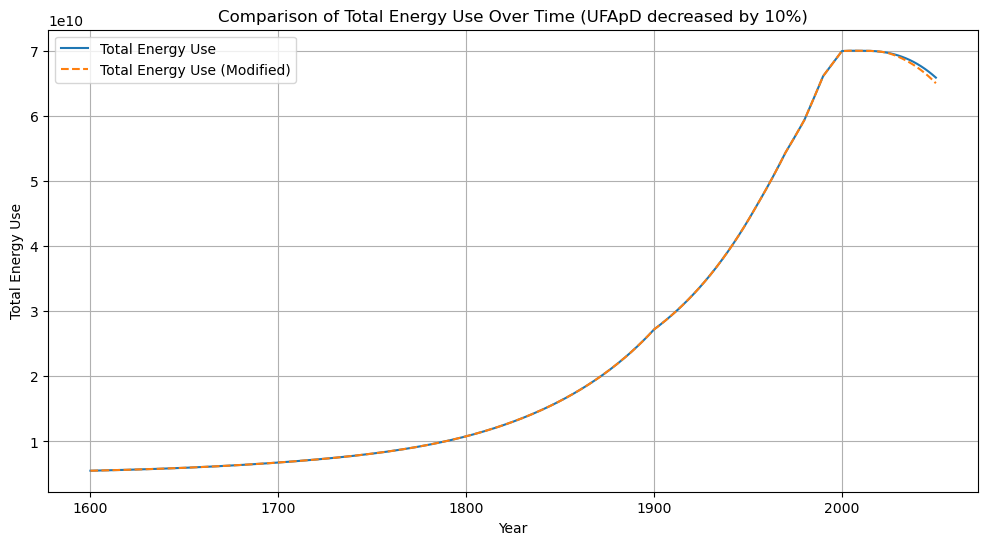

In [896]:
# Convert the Series to a DataFrame and reset the index
total_energy_use_modified2_df = total_energy_use_modified2.reset_index()

# Rename the columns
total_energy_use_modified2_df.columns = [
    'Year', 'Total Energy Use (Modified)']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(total_energy_use['Year'], total_energy_use[
    'Total energy use'], label='Total Energy Use')
plt.plot(total_energy_use_modified2_df[
    'Year'], total_energy_use_modified2_df[
        'Total Energy Use (Modified)'], 
        label='Total Energy Use (Modified)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.title('Comparison of Total Energy Use Over Time (UFApD decreased by 10%)')
plt.legend()
plt.grid(True)
plt.show()

In [897]:
aligned_data1 = total_energy_use.set_index('Year')

aligned_data2 = total_energy_use_modified2

# Focus on the years from 2025 to 2050
start_year = 2025
end_year = 2050
filtered_data1 = aligned_data1.loc[start_year:end_year]
filtered_data2 = aligned_data2.loc[start_year:end_year]

# Calculate the reduction percentage for these years
reduction_percentage = (
    (filtered_data1[
        'Total energy use'] - filtered_data2) / filtered_data1[
            'Total energy use']) * 100

# Calculate the average reduction percentage
average_reduction_percentage = reduction_percentage.mean()
print(f"When we decrease UFApD by 10% from 2025 to 2050, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")


When we decrease UFApD by 10% from 2025 to 2050, the total energy use reduces by an average of 0.65%.


## Sensitivity analysis for energy intensity

In [898]:
UFApD = UFApD.copy()
# set the original values for UFApD
for year in range(2025, 2051):
    UFApD.loc[year] /= 0.9

# decrease energy intensity by 10% from 2025 to 2050
energy_intensity = energy_intensity.copy()
energy_intensity.loc['2011-', 'Energy intensity  (kWh/m2a)'] *= 0.9

/var/folders/0m/82gp5vbn5_n34tv3bntxm1h40000gn/T/ipykernel_1345/3015080059.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  energy_intensity.loc['2011-', 'Energy intensity  (kWh/m2a)'] *= 0.9


Calculate stock from pop/PpD

In [899]:
stock_t = np.divide(pop.drop_duplicates(),PpD)

/var/folders/0m/82gp5vbn5_n34tv3bntxm1h40000gn/T/ipykernel_1345/4106792660.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  stock_t = np.divide(pop.drop_duplicates(),PpD)


In [900]:
def stock_driven_model(stock):
    dwellings_stock_driven = DynamicStockModel(t=np.arange(1600, 2051),
                         s=stock['Pop'].to_numpy(),
                         lt={'Type': 'Normal', 
                             'Mean': lifetime,
                             'StdDev': lifetime_standard_deviation 
                             }
                        )
    
    dwellings_stock_driven.compute_stock_driven_model(
        NegativeInflowCorrect = True)
    
    inflow_t = pd.DataFrame(
        dwellings_stock_driven.i, index=np.arange(1600,2051))
    
    inflow_t_SFH, inflow_t_TH, inflow_t_AB = calculate_inflow_by_type(
        inflow_t.T)
    inflow_t_SFH = inflow_t_SFH.T
    inflow_t_TH = inflow_t_TH.T
    inflow_t_AB = inflow_t_AB.T
    
    return inflow_t_SFH, inflow_t_TH, inflow_t_AB

Run the stock driven model

In [901]:
i_SFH, i_TH, i_AB = stock_driven_model(stock_t)

Define a function that does the inflow driven modeling

In [902]:
def inflow_driven_model(inflow):
    dwellings_inflow_driven = DynamicStockModel(t=np.arange(1600, 2051),
                    i=inflow[0],
                    lt={'Type': 'Normal', 
                        'Mean': lifetime,
                        'StdDev': lifetime_standard_deviation 
                        }
                    )
    dwellings_inflow_driven.compute_s_c_inflow_driven()

    dwellings_inflow_driven.compute_stock_total()

    dwellings_inflow_driven.compute_o_c_from_s_c()

    return dwellings_inflow_driven.s_c, dwellings_inflow_driven.s, dwellings_inflow_driven.o_c

Run the inflow driven model

In [903]:
s_c_SFH, s_SFH, o_SFH = inflow_driven_model(i_SFH)
s_c_TH, s_TH, o_TH = inflow_driven_model(i_TH)
s_c_AB, s_AB, o_AB = inflow_driven_model(i_AB)

i_SFH.rename(columns={0:'SFH'}, inplace=True)
i_TH.rename(columns={0:'TH'}, inplace=True)
i_AB.rename(columns={0:'AB'}, inplace=True)

Make s_c arrays into dataframes for easier use

In [904]:
UFApD.drop_duplicates(inplace=True)

s_SFH_df = pd.DataFrame(s_SFH)
s_SFH_df = s_SFH_df.set_index(UFApD.index)
s_SFH_df.columns = ['SFH']

s_TH_df = pd.DataFrame(s_TH)
s_TH_df = s_TH_df.set_index(UFApD.index)
s_TH_df.columns = ['TH']

s_AB_df = pd.DataFrame(s_AB)
s_AB_df = s_AB_df.set_index(UFApD.index)
s_AB_df.columns = ['AB']

s_c_SFH_df = pd.DataFrame(s_c_SFH)
s_c_SFH_df = s_c_SFH_df.set_index(UFApD.index)
s_c_SFH_df.columns = np.arange(1600, 2051)

s_c_TH_df = pd.DataFrame(s_c_TH)
s_c_TH_df = s_c_TH_df.set_index(UFApD.index)
s_c_TH_df.columns = np.arange(1600, 2051)

s_c_AB_df = pd.DataFrame(s_c_AB)
s_c_AB_df = s_c_AB_df.set_index(UFApD.index)
s_c_AB_df.columns = np.arange(1600, 2051)

i_SFH_df = pd.DataFrame(i_SFH)
i_SFH_df = i_SFH_df.set_index(UFApD.index)

o_SFH_df = pd.DataFrame(o_SFH)
o_SFH_df = o_SFH_df.set_index(UFApD.index)
o_SFH_df.columns = np.arange(1600, 2051)

i_TH_df = pd.DataFrame(i_TH)
i_TH_df = i_TH_df.set_index(UFApD.index)

o_TH_df = pd.DataFrame(o_TH)
o_TH_df = o_TH_df.set_index(UFApD.index)
o_TH_df.columns = np.arange(1600, 2051)

i_AB_df = pd.DataFrame(i_AB)
i_AB_df = i_AB_df.set_index(UFApD.index)

o_AB_df = pd.DataFrame(o_AB)
o_AB_df = o_AB_df.set_index(UFApD.index)
o_AB_df.columns = np.arange(1600, 2051)

Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [905]:
SFH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [906]:
s_total = s_SFH_df + s_TH_df + s_AB_df

total_stock_by_tabula_cohort = SFH_stock_by_tabula_cohort + TH_stock_by_tabula_cohort + AB_stock_by_tabula_cohort

stock_change_SFH = i_SFH_df.values - pd.DataFrame(o_SFH_df.sum(axis=1))
stock_change_SFH = pd.DataFrame(
    stock_change_SFH, index=np.arange(1600,2051))

stock_change_TH = i_TH_df.values - pd.DataFrame(o_TH_df.sum(axis=1))
stock_change_TH = pd.DataFrame(
    stock_change_TH, index=np.arange(1600,2051))

stock_change_AB = i_AB_df.values - pd.DataFrame(o_AB_df.sum(axis=1))
stock_change_AB = pd.DataFrame(
    stock_change_AB, index=np.arange(1600,2051))

stock_change_total = stock_change_SFH + stock_change_TH + stock_change_AB

i_total = i_SFH_df.values + i_TH_df.values + i_AB_df.values
i_total = pd.DataFrame(i_total, index=np.arange(1600,2051))

o_total = o_SFH_df + o_TH_df + o_AB_df

Convert number of dwellings into floor area by DSM cohort

In [907]:
s_UFA_c_SFH = s_c_SFH_df @ np.diag(UFApD['UFApD SFH'])
s_UFA_c_SFH = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH.columns = np.arange(1600, 2051)

s_UFA_c_TH = s_c_TH_df @ np.diag(UFApD['UFApD TH'])
s_UFA_c_TH = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH.columns = np.arange(1600, 2051)

s_UFA_c_AB = s_c_AB_df @ np.diag(UFApD['UFApD AB'])
s_UFA_c_AB = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB.columns = np.arange(1600, 2051)

i_SFH_UFA = i_SFH_df.mul(UFApD['UFApD SFH'].values, axis=0)
i_SFH_UFA = pd.DataFrame(i_SFH_UFA)

o_SFH_UFA = o_SFH_df @ np.diag(UFApD['UFApD SFH'])
o_SFH_UFA = pd.DataFrame(o_SFH_UFA)
o_SFH_UFA.columns = np.arange(1600, 2051)

i_TH_UFA = i_TH_df.mul(UFApD['UFApD TH'].values, axis=0)
i_TH_UFA = pd.DataFrame(i_TH_UFA)

o_TH_UFA = o_TH_df @ np.diag(UFApD['UFApD TH'])
o_TH_UFA = pd.DataFrame(o_TH_UFA)
o_TH_UFA.columns = np.arange(1600, 2051)

i_AB_UFA = i_AB_df.mul(UFApD['UFApD AB'].values, axis=0)
i_AB_UFA = pd.DataFrame(i_AB_UFA)

o_AB_UFA = o_AB_df @ np.diag(UFApD['UFApD AB'])
o_AB_UFA = pd.DataFrame(o_AB_UFA)
o_AB_UFA.columns = np.arange(1600, 2051)

Make s_c_UFA arrays into dataframes for easier use

In [908]:
UFApD.drop_duplicates(inplace=True)

s_UFA_c_SFH_df = pd.DataFrame(s_UFA_c_SFH)
s_UFA_c_SFH_df = s_UFA_c_SFH_df.set_index(UFApD.index)
s_UFA_c_SFH_df.columns = np.arange(1600, 2051)
s_UFA_c_SFH_df

s_UFA_c_TH_df = pd.DataFrame(s_UFA_c_TH)
s_UFA_c_TH_df = s_UFA_c_TH_df.set_index(UFApD.index)
s_UFA_c_TH_df.columns = np.arange(1600, 2051)
s_UFA_c_TH_df

s_UFA_c_AB_df = pd.DataFrame(s_UFA_c_AB)
s_UFA_c_AB_df = s_UFA_c_AB_df.set_index(UFApD.index)
s_UFA_c_AB_df.columns = np.arange(1600, 2051)
s_UFA_c_AB_df

,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Year,,,,,,,,,,,,,,,,,,,,,
1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004402e+06,1.009507e+06,1.014769e+06,1.020193e+06,1.025783e+06,1.031541e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004402e+06,1.009507e+06,1.014769e+06,1.020193e+06,1.025783e+06,1.031541e+06,1.037471e+06,0.000000e+00,0.000000e+00,0.000000e+00
2048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.004401e+06,1.009506e+06,1.014769e+06,1.020193e+06,1.025782e+06,1.031541e+06,1.037471e+06,1.043574e+06,0.000000e+00,0.000000e+00


Aggregate s_c dataframes into the cohorts from tabula for each type for plotting

In [909]:
SFH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_SFH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_SFH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

TH_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_TH_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_TH_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

AB_UFA_stock_by_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(s_UFA_c_AB_df).loc[
        :,'1600':'1955'].sum(axis=1), 
          '1956-1970': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1956':'1970'].sum(axis=1), 
          '1971-1980': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1971':'1980'].sum(axis=1), 
          '1981-1990': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1981':'1990'].sum(axis=1), 
          '1991-2000': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'1991':'2000'].sum(axis=1), 
          '2001-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2001':'2010'].sum(axis=1), 
          'post-2010': pd.DataFrame(s_UFA_c_AB_df).loc[
              :,'2011':'2050'].sum(axis=1)}
          )

Calculate total stock (s_total), total stock by cohort (s_c_total)

Calculate stock_changes by inflow - outflow for each type and aggregated

Calculate total inflows and outflows

In [910]:
s_UFA_total = s_UFA_c_SFH.sum(
    axis=1) + s_UFA_c_TH.sum(axis=1) + s_UFA_c_AB.sum(axis=1)

total_stock_UFA_by_tabula_cohort = SFH_UFA_stock_by_tabula_cohort + TH_UFA_stock_by_tabula_cohort + AB_UFA_stock_by_tabula_cohort

stock_change_SFH_UFA = i_SFH_UFA.values - pd.DataFrame(
    o_SFH_UFA.sum(axis=1))
stock_change_SFH_UFA = pd.DataFrame(
    stock_change_SFH_UFA, index=np.arange(1600,2051))

stock_change_TH_UFA = i_TH_UFA.values - pd.DataFrame(
    o_TH_UFA.sum(axis=1))
stock_change_TH_UFA = pd.DataFrame(
    stock_change_TH_UFA, index=np.arange(1600,2051))

stock_change_AB_UFA = i_AB_UFA.values - pd.DataFrame(
    o_AB_UFA.sum(axis=1))
stock_change_AB_UFA = pd.DataFrame(
    stock_change_AB_UFA, index=np.arange(1600,2051))

stock_change_total_UFA = stock_change_SFH_UFA + stock_change_TH_UFA + stock_change_AB_UFA

i_total_UFA = i_SFH_UFA.values + i_TH_UFA.values + i_AB_UFA.values
i_total_UFA = pd.DataFrame(i_total_UFA, index=np.arange(1600,2051))

o_total_UFA = o_SFH_UFA + o_TH_UFA + o_AB_UFA

Define a function that calculates energy use for SFH, original renovation level

In [911]:
def energy_use_calculation_SFH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1971-80' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1981-90' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('1991-2000' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2001-2010' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_SFH.loc[
                        :, year],energy_intensity.loc[
                            ('2011-' , 'SFH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [912]:
# function that spits out energy use of SFH by DSM cohort
energy_use_matrix_SFH = energy_use_calculation_SFH(s_UFA_c_SFH)

# vector of energy use for SFH (not by cohort)
energy_use_vector_SFH = energy_use_matrix_SFH.sum(axis=1)

Define a function that calculates energy use for TH, original renovation level

In [913]:
def energy_use_calculation_TH(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('pre 1955' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(
                np.multiply(
                    s_UFA_c_TH.loc[
                        :, year],energy_intensity.loc[
                            ('1956-70' , 'TH', 'OG'),
                            'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(
                np.multiply(s_UFA_c_TH.loc[
                    :, year],energy_intensity.loc[
                        ('1971-80' , 'TH', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(
                np.multiply(s_UFA_c_TH.loc[
                    :, year],energy_intensity.loc[
                        ('1981-90' , 'TH', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(
                np.multiply(s_UFA_c_TH.loc[
                    :, year],energy_intensity.loc[
                        ('1991-2000' , 'TH', 'OG'),
                        'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(
                s_UFA_c_TH.loc[:, year],energy_intensity.loc[
                    ('2001-2010' , 'TH', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(
                s_UFA_c_TH.loc[:, year],energy_intensity.loc[
                    ('2011-' , 'TH', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [914]:
energy_use_matrix_TH = energy_use_calculation_TH(s_UFA_c_TH)

energy_use_vector_TH = energy_use_matrix_TH.sum(axis=1)

In [915]:
def energy_use_calculation_AB(stock_c_UFA):
    energy_use_matrix = pd.DataFrame()
    for year in stock_c_UFA.columns:
        if int(year) <= 1955:
            iteration = pd.DataFrame(np.multiply(
                s_UFA_c_AB.loc[:, year],energy_intensity.loc[
                    ('pre 1955' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1956 and int(year) <= 1970:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('1956-70' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1971 and int(year) <= 1980:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('1971-80' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1981 and int(year) <= 1990:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('1981-90' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 1991 and int(year) <= 2000:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('1991-2000' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2001 and int(year) <= 2010:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('2001-2010' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
        elif int(year) >= 2011:
            iteration = pd.DataFrame(np.multiply(s_UFA_c_AB.loc[
                :, year],energy_intensity.loc[
                    ('2011-' , 'AB', 'OG'),
                    'Energy intensity  (kWh/m2a)']))
            energy_use_matrix = pd.concat(
                [energy_use_matrix, iteration], axis=1)
    return energy_use_matrix

In [916]:
# function that spits out energy use of TH by DSM cohort
energy_use_matrix_AB = energy_use_calculation_AB(s_UFA_c_AB)

# vector of energy use for TH (not by cohort)
energy_use_vector_AB = energy_use_matrix_AB.sum(axis=1)

Calculate total energy use matrix

In [917]:
energy_use_matrix_total = energy_use_matrix_SFH + energy_use_matrix_TH + energy_use_matrix_AB

Concatenate energy use vectors

In [918]:
energy_use_vectors_concatenated = pd.concat(
    [energy_use_vector_SFH, energy_use_vector_TH, energy_use_vector_AB],
      axis=1)
energy_use_vectors_concatenated = energy_use_vectors_concatenated.rename(
    columns={0: 'SFH', 1: 'TH', 2: 'AB'})


energy_use_vectors_concatenated 

,SFH,TH,AB
Year,,,
1600,5.437150e+09,5.548318e+07,0.000000e+00
1601,5.443498e+09,5.554801e+07,0.000000e+00
1602,5.449931e+09,5.561374e+07,0.000000e+00
1603,5.456449e+09,5.568039e+07,0.000000e+00
1604,5.463054e+09,5.574798e+07,0.000000e+00
...,...,...,...
2046,4.208933e+10,7.788528e+09,5.390662e+09
2047,4.163065e+10,7.720291e+09,5.347750e+09
2048,4.116422e+10,7.650242e+09,5.303535e+09


Put energy use matrix into tabula cohorts

In [919]:
energy_use_matrix_total_tabula_cohort = pd.DataFrame(
    data={'pre-1955': pd.DataFrame(energy_use_matrix_total).loc[
        :,'1600':'1955'].sum(axis=1)/1000000000, 
          '1956-1970': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1956':'1970'].sum(axis=1)/1000000000, 
          '1971-1980': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1971':'1980'].sum(axis=1)/1000000000, 
          '1981-1990': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1981':'1990'].sum(axis=1)/1000000000, 
          '1991-2000': pd.DataFrame(energy_use_matrix_total).loc[
              :,'1991':'2000'].sum(axis=1)/1000000000, 
          '2001-2010': pd.DataFrame(energy_use_matrix_total).loc[
              :,'2001':'2010'].sum(axis=1)/1000000000, 
          'post-2010': pd.DataFrame(energy_use_matrix_total).loc[
              :,'2011':'2050'].sum(axis=1)/1000000000}
          )

Calculate total energy use with modified energy intensity

In [920]:
total_energy_use_modified3 = energy_use_vector_SFH + energy_use_vector_TH + energy_use_vector_AB

Original total energy use vs total energy use with energy intensity decreased by 10%

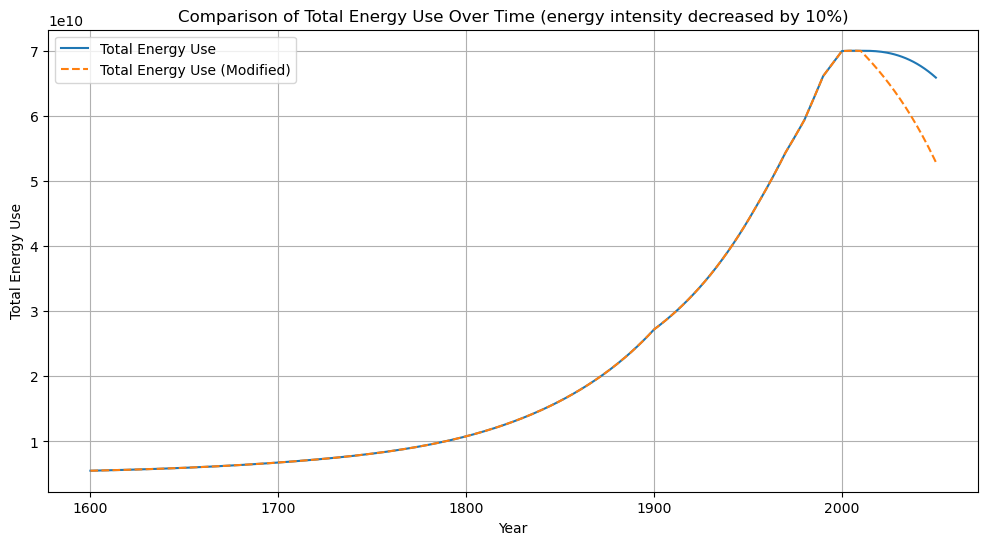

In [921]:
# Convert the Series to a DataFrame and reset the index
total_energy_use_modified3_df = total_energy_use_modified3.reset_index()

# Rename the columns
total_energy_use_modified3_df.columns = [
    'Year', 'Total Energy Use (Modified)']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(total_energy_use['Year'], total_energy_use[
    'Total energy use'], label='Total Energy Use')
plt.plot(total_energy_use_modified3_df[
    'Year'], total_energy_use_modified3_df[
        'Total Energy Use (Modified)'], 
        label='Total Energy Use (Modified)', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total Energy Use')
plt.title('Comparison of Total Energy Use Over Time (energy intensity decreased by 10%)')
plt.legend()
plt.grid(True)
plt.show()

In [922]:

aligned_data1 = total_energy_use.set_index('Year')

aligned_data2 = total_energy_use_modified3

# Focus on the years from 2025 to 2050
start_year = 2025
end_year = 2050
filtered_data1 = aligned_data1.loc[start_year:end_year]
filtered_data2 = aligned_data2.loc[start_year:end_year]

# Calculate the reduction percentage for these years
reduction_percentage = (
    (filtered_data1[
        'Total energy use'] - filtered_data2) / filtered_data1[
            'Total energy use']) * 100

# Calculate the average reduction percentage
average_reduction_percentage = reduction_percentage.mean()
print(f"When we decrease energy intensity by 10% from 2025 to 2050, the total energy use reduces by an average of {average_reduction_percentage:.2f}%.")


When we decrease energy intensity by 10% from 2025 to 2050, the total energy use reduces by an average of 12.94%.
